# 1.Introduction

In this project, we will analyse the Euro dataset between 1999-2021, the objective is to see if the Covid-19 pandemic had an impact on the price of the EUR/USD   

import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
exchange_rates.info()

## Data cleaning

In [7]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True) #Rename two columns
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) #convert the time column to datetime type
exchange_rates.sort_values('Time', inplace=True) #sort the time in ascending order
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']] #assign the 'Time' and 'US_dollar' columns to a new dataframe called euro_to_dollar

In [9]:
#checking to see the frequencies of values and check for any abnormalities
euro_to_dollar['US_dollar'].value_counts(ascending = False)

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.2631     1
1.5746     1
1.0058     1
1.4144     1
1.4787     1
Name: US_dollar, Length: 3528, dtype: int64

In [10]:
#Remove all the rows where US_dollar column has -
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-'] 

In [11]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)  #convert the 'US_dollar' data type to float

In [12]:
print(euro_to_dollar['US_dollar'].dtype)

float64


Below we will creater a new column showing the 30 days rolling averages for the price of EUR/USD

In [14]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

**We will show how the euro-dollar rate has changed during the coronavirus pandemic**

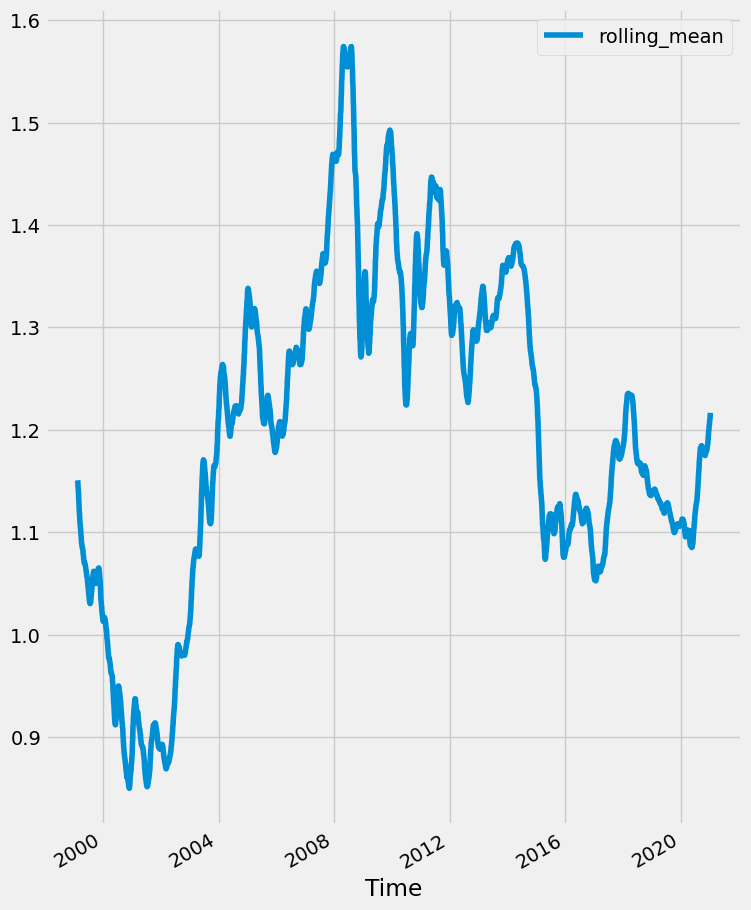

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
euro_to_dollar.plot(x = 'Time', y = 'rolling_mean', figsize = (8, 12))

In [17]:
#breaking the plt into precovid and covid period
pre_covid = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2016) & (euro_to_dollar['Time'].dt.year <= 2019)]
covid = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year <= 2021)]

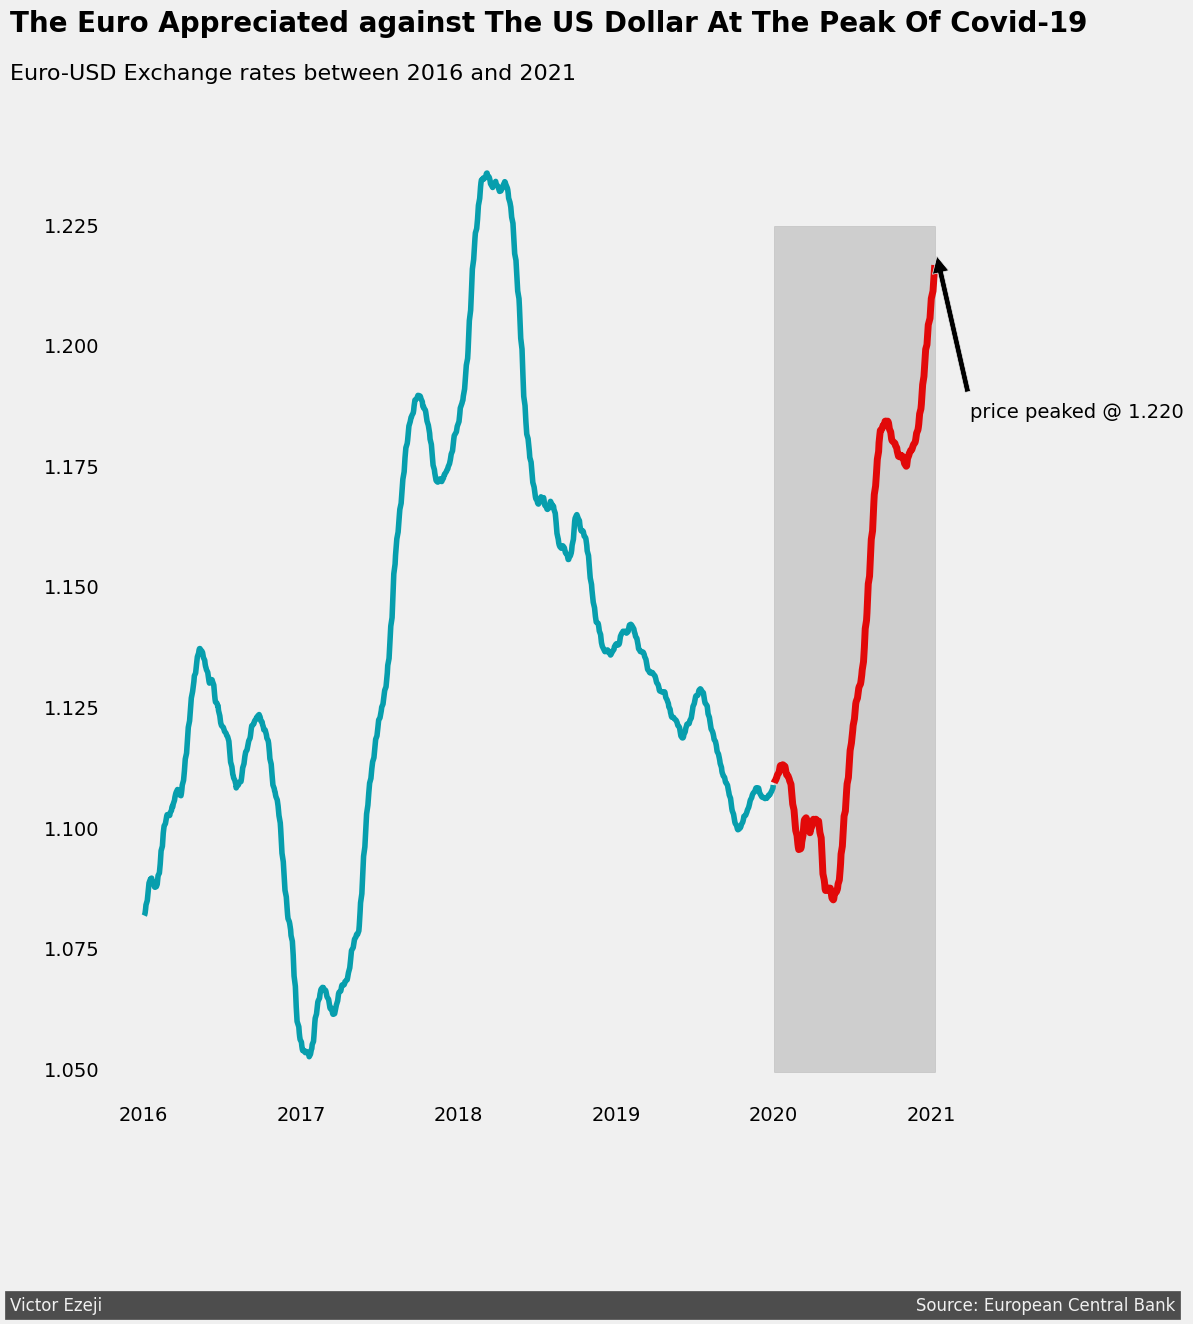

In [18]:
fig, ax = plt.subplots(figsize = (10,12))
ax.plot(pre_covid['Time'], pre_covid['rolling_mean'], color = '#079ead')
ax.plot(covid['Time'], covid['rolling_mean'], color = '#e20909',linewidth = 5)

#setting x & y axis
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels(['0','2016','2017','2018','2019','2020','2021'])
ax.set_yticklabels(['0','1.050','1.075','1.100','1.125','1.150','1.175','1.200','1.225'])

#Remove the grid lines
ax.grid(False)

#Titles
ax.text(x=735656.0, y=1.2650,s='The Euro Appreciated against The US Dollar At The Peak Of Covid-19',size = 20, weight = 'bold' )
ax.text(x=735656.0, y=1.2550, s='Euro-USD Exchange rates between 2016 and 2021', fontsize = 16 )

#Foot signature/ source
ax.text(735656.0, 1.0000, 'Victor Ezeji'+ ' '* 155 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d',size=12)

#vertical enclosure
ax.axvspan(xmin=737426.0, xmax=737799.0, ymin=0.03, ymax = 0.9, alpha=0.3, color='grey')

#insert an arrow sign with a text
ax.annotate('price peaked @ 1.220', xy = (737799.0, 1.220), xytext = (737880.0, 1.1850), arrowprops = dict(facecolor='black', shrink=0.05))
plt.show()

# Conclusion

In this project we explored the EUR/USD dataset from 2016 and 2021, our goal was to see the impact of covid-19 on the currency pair.

From the plot above, we can see that the Euro appreciated against the dollar during the peak of the covid-19, retracing from a downtrend from 2018.